# 1 - Define the Linear Congruential Function

In [1]:
def linear_congruential_generator(seed, a, c, m):
    return (a * seed + c) % m

# 2 - Generate Random Numbers

In [2]:
# a = 7
# c = 7
# m = 50
# seed = 50

# For numerical recipes
a  = 1664525
c  = 1013904223
m  = 2**32
seed = 100

for _ in range(100):
    seed = linear_congruential_generator(seed, a, c, m)
    print(seed)

1180356723
1498700598
1247090973
1587005400
131869015
1687467722
1921693601
1096641676
1629044347
1402937758
727096421
939664000
1288287199
287240114
3605269353
533749172
99446147
3572151558
1041270957
1386205736
2721091431
3541583258
1819269169
1795781596
3230629259
1917891950
3935305205
1373337296
1882905583
3714340994
444415481
2295156484
3015413395
69124822
3129351229
3866341496
1146534263
1599785066
3527367873
930385708
2041692315
206994750
2378695557
2029723424
2041989119
323433810
3410842761
2691421268
347485091
3979183270
1590612941
609772232
4056917895
2632531770
1344423249
3132341884
4019259307
4019026190
2537008405
4594544
3705468943
3086255650
446517017
4250987940
3993918643
429128310
4098076509
3151161624
2455525783
915450378
1082233313
1646002636
2373866171
3574769886
4216847013
2279697344
2039475231
3487124210
2952146345
3080821492
355797443
1712268358
4269649645
1369981800
33410983
3193833690
1007043185
1145198876
3607798219
826477742
2967596085
1295126544
2884641839
78

# 3 - Test the sequence period

In [3]:
nums = []

for _ in range(int(1e6)):
    seed = linear_congruential_generator(seed, a, c, m)
    nums.append(seed)

print(len(set(nums)))

1000000


# 4 - Check Uniformity

## What Makes “Good” Parameters?
* Full period: They ensure that the generator cycles through all possible states (except maybe zero in the case with c=0) before repeating.
* Good distributional properties: They reduce detectable patterns and provide a reasonably uniform distribution of numbers.
* Well-tested in literature: These sets have been analyzed extensively and are known to pass many of the simpler statistical tests for randomness.

* Testing uniformity visually (e.g., plotting generated values modulo m).
* Testing the period sequence length

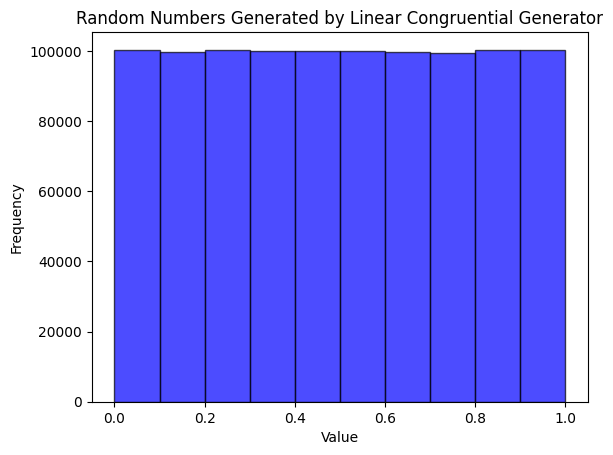

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize the numbers to the range [0, 1]
max_value = max(nums)
normalized_nums = [num / max_value for num in nums]

# Plot histogram
plt.hist(normalized_nums, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title("Random Numbers Generated by Linear Congruential Generator")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 5 - Autocorrelation Testing

In [5]:
import statsmodels.api as sm

# Define the maximum number of lags to test
max_lags = 10

# Perform the Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(nums, lags=list(range(1, max_lags + 1)), return_df=True)

print(lb_test)

     lb_stat  lb_pvalue
1   1.704495   0.191701
2   1.717641   0.423661
3   2.386047   0.496237
4   3.813153   0.431883
5   3.827607   0.574494
6   3.832171   0.699376
7   6.305470   0.504568
8   7.803014   0.452945
9   7.869919   0.547307
10  9.296346   0.504229


For "Numerical Recipes parameters", all lags tested show p-values comfortably above a typical significance threshold (such as 0.19). This indicates there is no statistically significant evidence of autocorrelation at any of the lags tested. In other words, the sequence of random numbers appears independent, and the Ljung-Box test does not suggest any hidden patterns or correlations.

# 6 - Additional resources for other sections topics

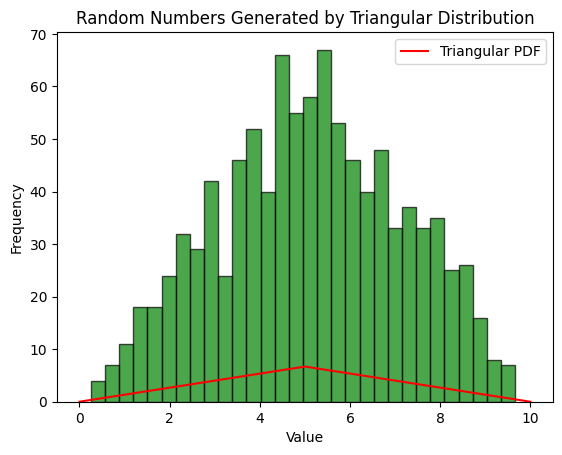

In [8]:
# Parameters for the triangular distribution
left = 0
mode = 5
right = 10

# Generate random numbers
data = np.random.triangular(left, mode, right, size=1000)

# Plot histogram
plt.hist(data, bins=30, alpha=0.7, color='green', edgecolor='black')

# Overlay the triangular distribution line
x = np.linspace(left, right, 1000)
pdf = np.where(x < mode, (x - left) / ((right - left) * (mode - left)), (right - x) / ((right - left) * (right  - mode)))
plt.plot(x, pdf * max(np.histogram(data, bins=30)[0]), color='red', label='Triangular PDF')
plt.legend()

plt.title("Random Numbers Generated by Triangular Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

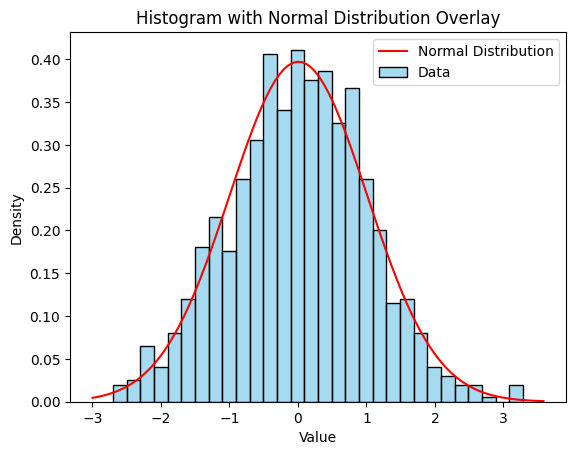

In [9]:
import seaborn as sns
from scipy.stats import norm

# Generate normal distributed random numbers
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram of the data with density=True to normalize the histogram
sns.histplot(data, kde=False, stat='density', bins=30, color='skyblue', label='Data')

# Overlay the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc=np.mean(data), scale=np.std(data))
plt.plot(x, p, 'r', label='Normal Distribution')

plt.title('Histogram with Normal Distribution Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

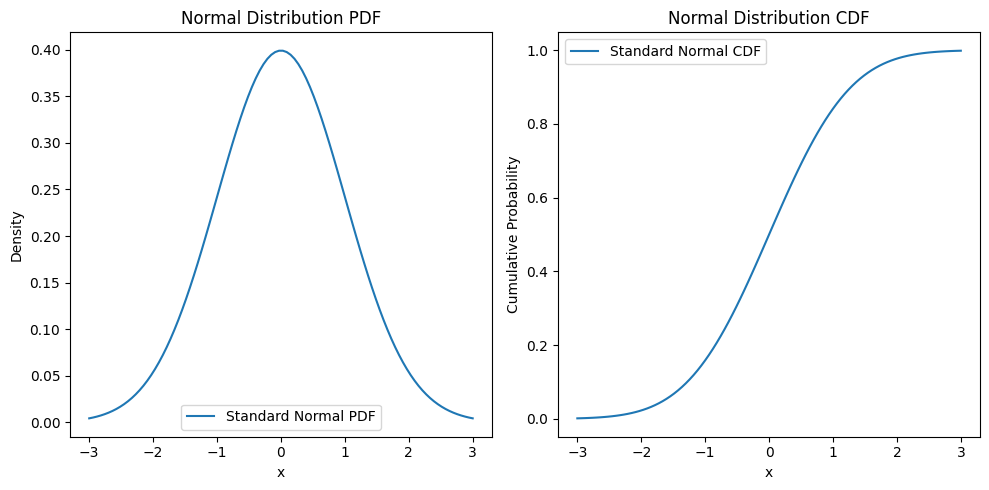

In [10]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Normal distribution data
x = np.linspace(-3, 3, 100)
pdf = norm.pdf(x, 0, 1)

# Plot the probability density function (PDF)
ax1.plot(x, pdf, label='Standard Normal PDF')
ax1.set_title('Normal Distribution PDF')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()

# Cumulative distribution function (CDF)
cdf = norm.cdf(x, 0, 1)

# Plot the cumulative distribution function (CDF)
ax2.plot(x, cdf, label='Standard Normal CDF')
ax2.set_title('Normal Distribution CDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Cumulative Probability')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

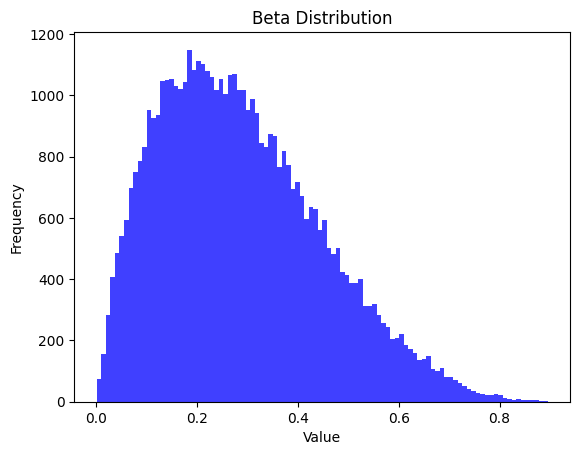

In [11]:
nums = np.random.beta(a=2.0, b=5.0, size=50000)
#nums = np.random.binomial(n=10, p=0.3, size=50000)
#nums = np.random.random(size=50000)

plt.hist(nums, bins=100, alpha=0.75, color='blue')
plt.title('Beta Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

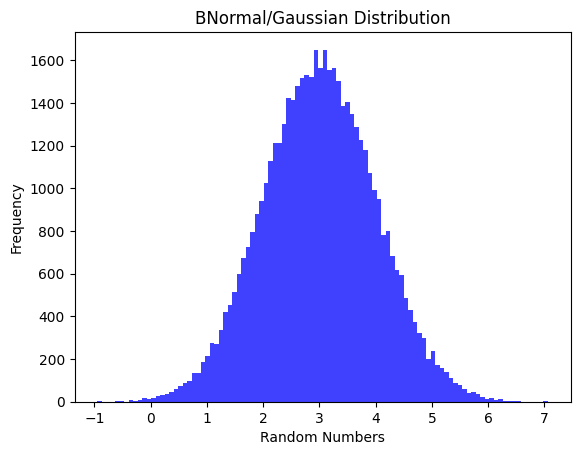

In [12]:
nums = np.random.normal(loc=3.0, scale=1.0, size=50000)

plt.hist(nums, bins=100, alpha=0.75, color='blue')
plt.title('BNormal/Gaussian Distribution')
plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.show()